Connect Colab with Drive and read the dataset.

In [2]:
# import library
import pandas as pd

# connect with drive
from google.colab import drive
drive.mount('/content/drive')

# read dataset
datapath = r'drive/My Drive/Mengajar/Analitika Bisnis/Code/Dataset/5-3 BreakfastCereal.csv'
data = pd.read_csv(datapath)

print(data.columns.tolist())

Mounted at /content/drive
['Cereal Name', 'Manufacturer', 'Type', 'Calories', 'Protein (g)', 'Fat', 'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf', 'Potassium', 'Vitamins and Minerals', 'Serving Size Weight', 'Cups per Serving']


Removing non-numerical data

In [3]:
data.drop(['Cereal Name', 'Manufacturer', 'Type'], axis=1, inplace=True)

print(data.columns.tolist())

['Calories', 'Protein (g)', 'Fat', 'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf', 'Potassium', 'Vitamins and Minerals', 'Serving Size Weight', 'Cups per Serving']


Data normalization

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()           #use minimum & maximum value of attribute to scale the data
scaled_data = scaler.fit_transform(data) 

df = pd.DataFrame(scaled_data, columns = data.columns)
df.head()

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,1.0,0.848943,0.25,0.5,0.532
1,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,1.0,0.410876,0.00,0.5,0.000
2,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,1.0,0.969789,0.25,0.5,0.532
3,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.0,1.000000,0.25,0.5,0.600
4,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,1.0,0.000000,0.25,0.5,0.700


Plot correlation between each variable using "seaborn" library

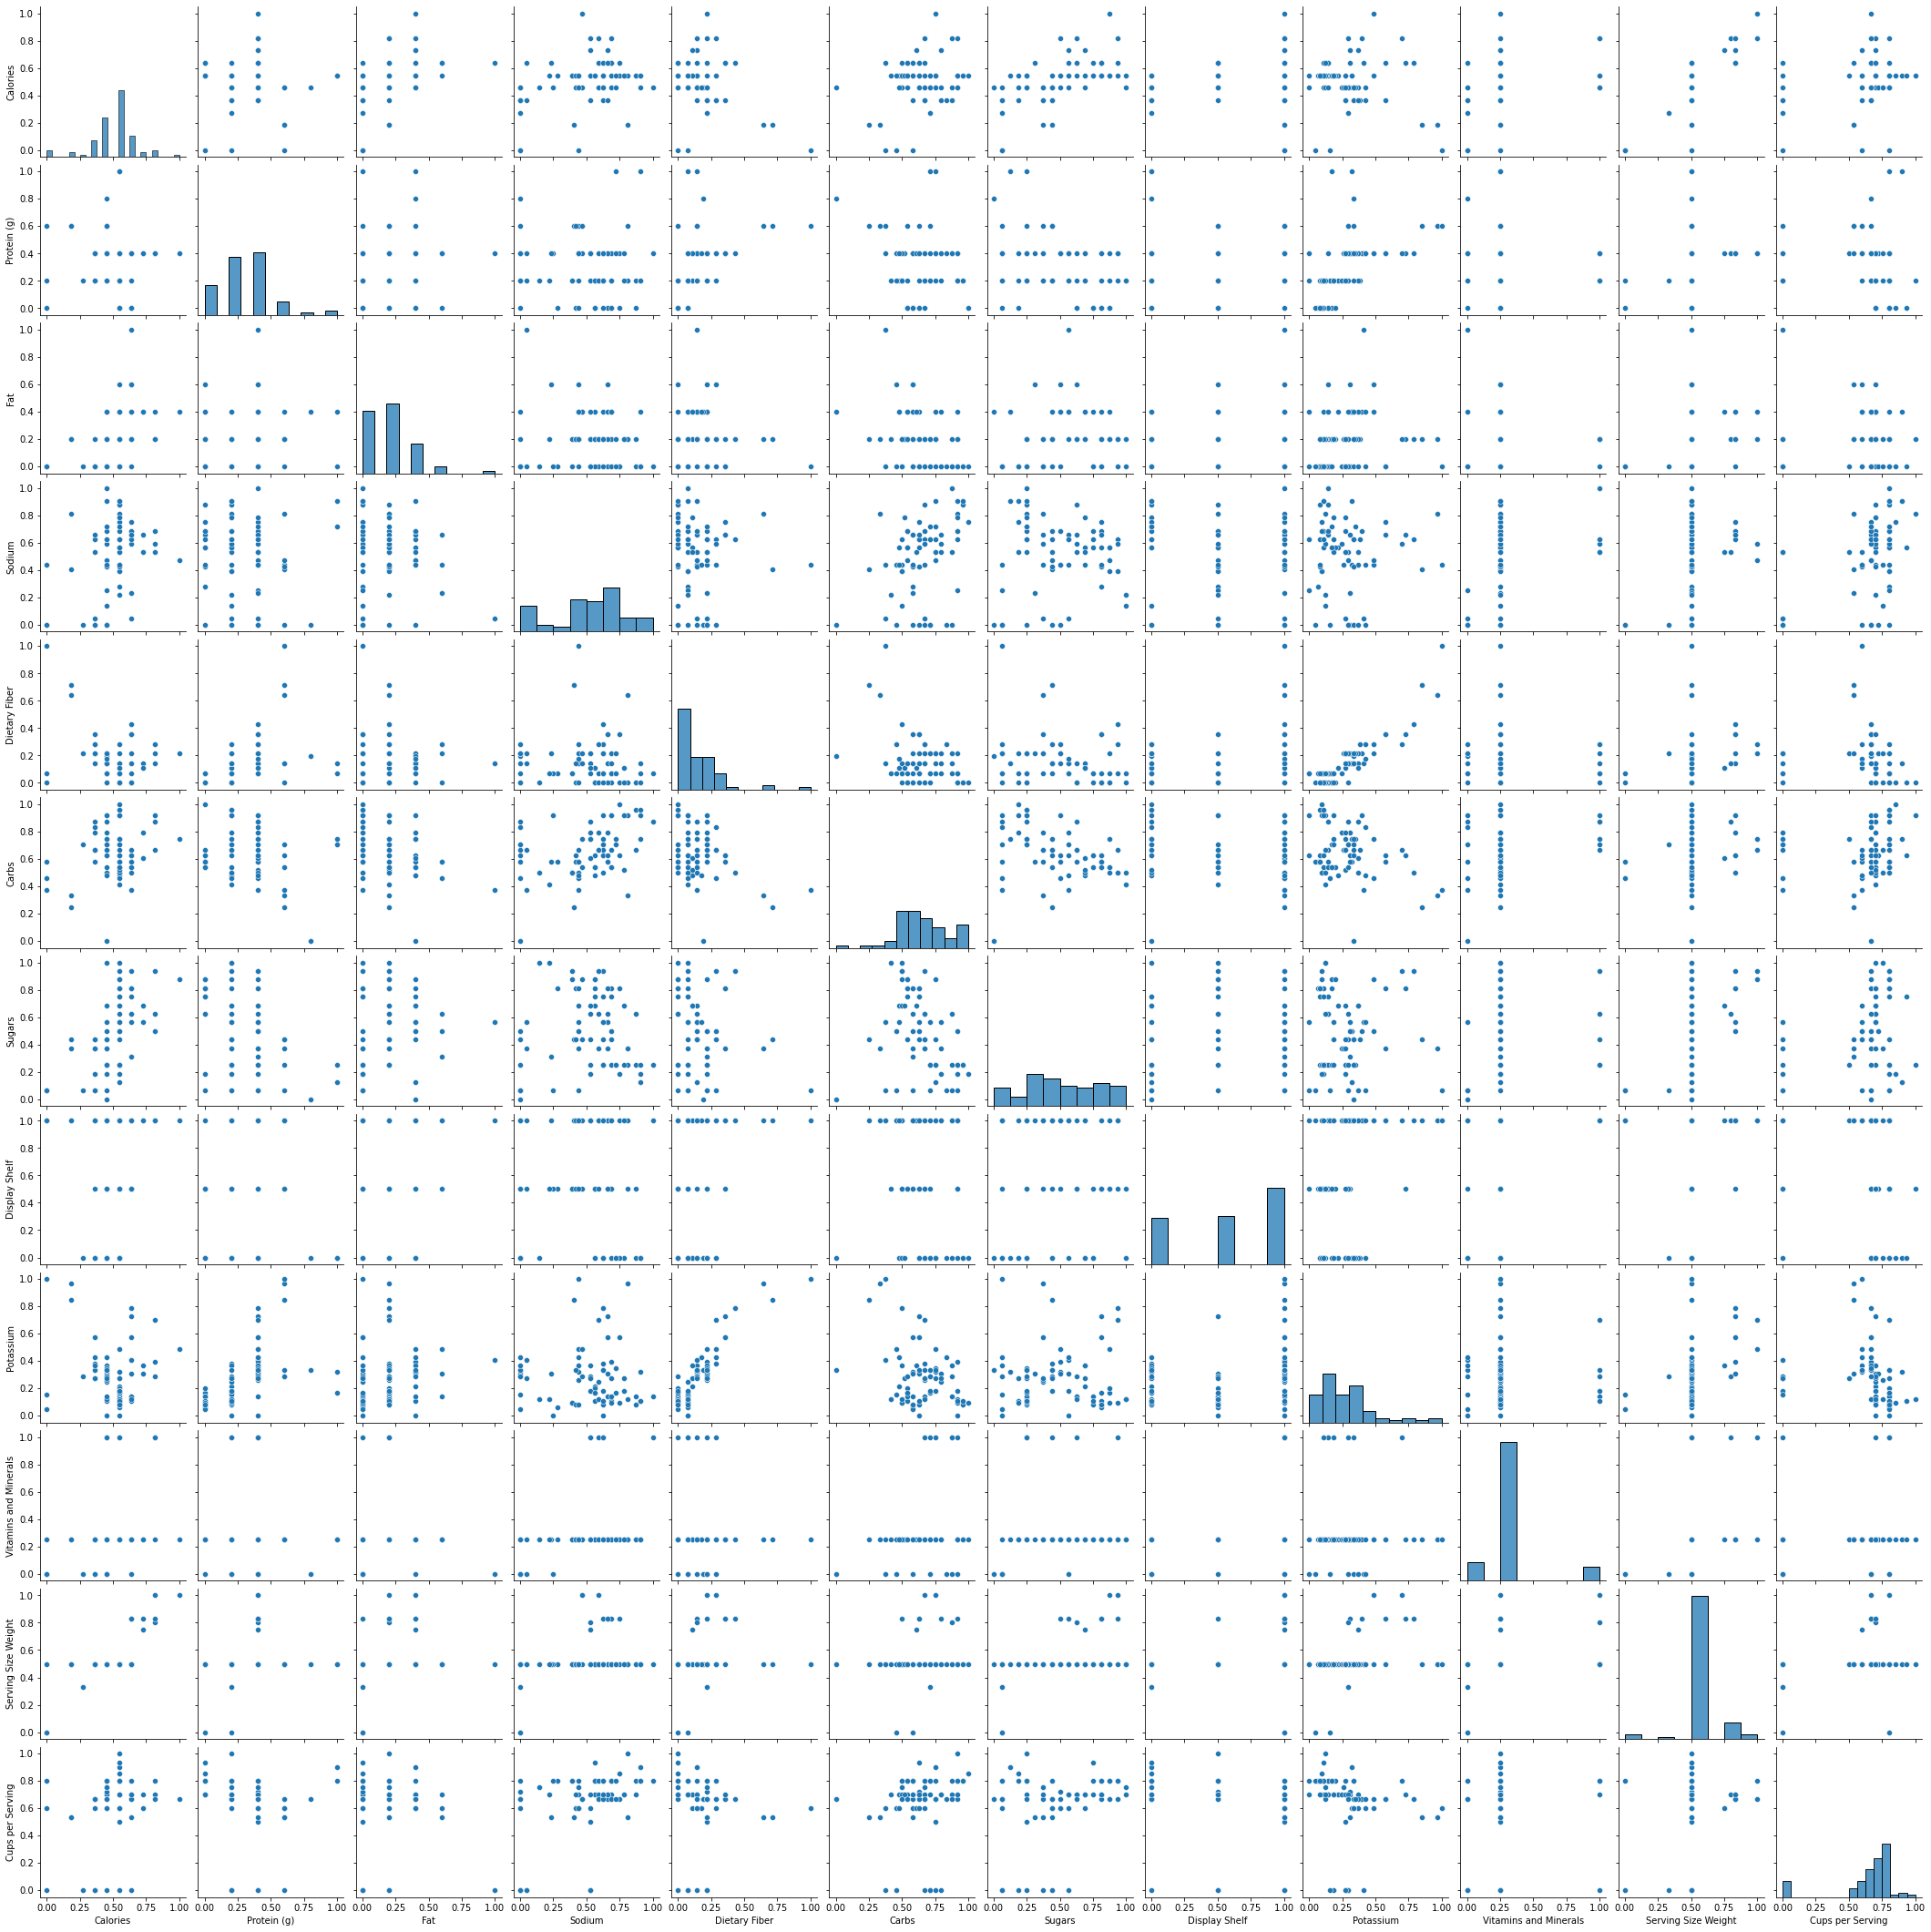

In [6]:
import seaborn as sns

sns.pairplot(df)

Reduce the data dimension from 12 --> 2 using PCA

More about PCA: https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df)      # This is used for training data

#For testing data, use transform() only because we don't neet to fit the PCA to the data anymore
#Because we already fit the PCA to the train data so the scaler for the test data only follows the first one
#pca_test_result = pca.transform(test_data)

datapca = pd.DataFrame(pca_result, columns = ['PCA 1', 'PCA 2'])
datapca.head()

,PCA 1,PCA 2
0,-0.702763,0.478644
1,-0.636120,0.409790
2,-0.684461,0.313072
3,-0.722904,0.767495
4,-0.275241,-0.240080


The two-dimensional data can be visualized in a 2D scatter plot

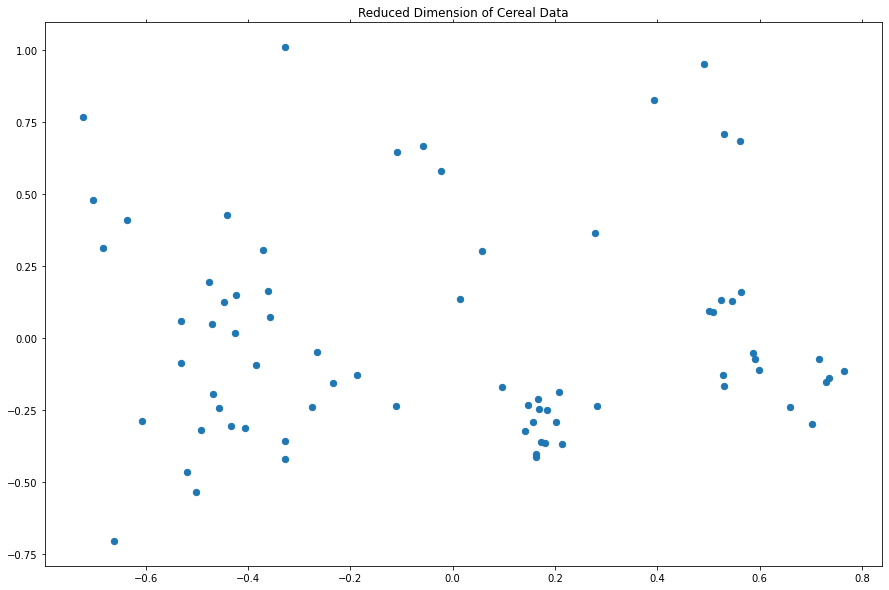

In [8]:
import matplotlib.pyplot as plt

x, y = pca_result[:, 0], pca_result[:, 1]

fig, ax = plt.subplots(figsize=(15, 10)) 
plt.scatter(x, y, s=40, cmap=plt.cm.Spectral)
ax.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
ax.tick_params(axis= 'y', which='both', left='off', top='off',labelleft='off')
ax.set_title("Reduced Dimension of Cereal Data")
plt.show()